# Wine Quality Prediction — Full Machine Learning Project

## Aim:

Predict the quality of wine based on its chemical composition and physiochemical properties using machine learning models.

## Description:

This project aims to predict wine quality scores using various physicochemical attributes such as acidity, sugar, and pH. Multiple ML models like Random Forest, SVM, KNN, and Gradient Boosting are trained and compared for performance. The project demonstrates regression-based classification, feature importance analysis, and model tuning to determine key factors affecting wine quality.

In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


#### Load Dataset

In [20]:
df = pd.read_csv("wineQT[1].csv")
print("✅ Dataset Loaded Successfully")
print("Shape of Dataset:", df.shape)
df.head()

✅ Dataset Loaded Successfully
Shape of Dataset: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### Explore Dataset

In [22]:
#Basic Info
print("\nBasic Information:\n")
print(df.info())

#Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

#Statistical Summary
print("\nStatistical Summary:\n")
print(df.describe())


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Missing Values:

fixed acidity           0
volat

#### Distribution of Target Variable

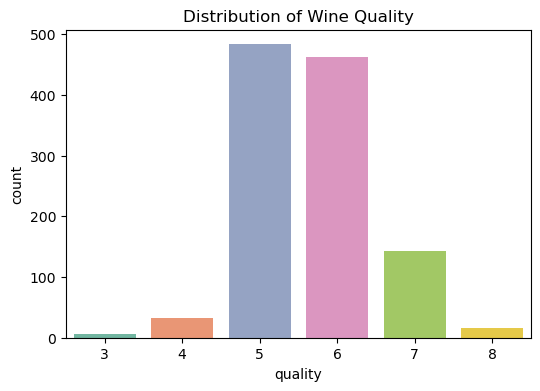

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribution of Wine Quality")
plt.show()

#### Correlation Heatmap

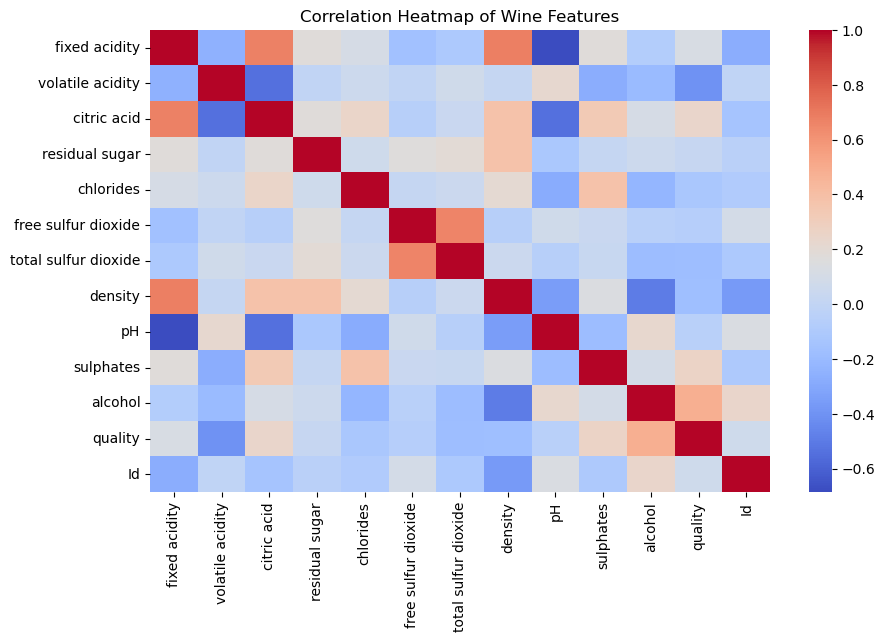

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

#### Convert Quality to Categorical Labels

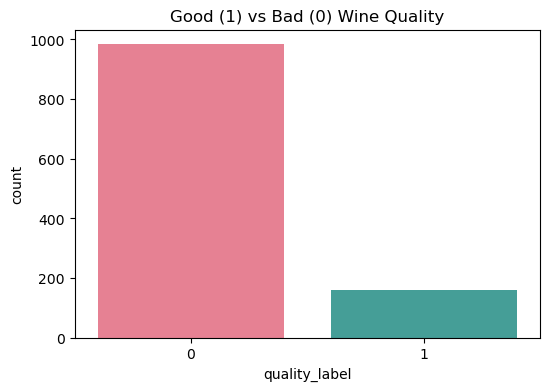

quality_label
0    984
1    159
Name: count, dtype: int64


In [27]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

plt.figure(figsize=(6,4))
sns.countplot(x='quality_label', data=df, palette='husl')
plt.title("Good (1) vs Bad (0) Wine Quality")
plt.show()

print(df['quality_label'].value_counts())

#### Define Features and Target

In [29]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

print("✅ Features and Target Defined")
print("X Shape:", X.shape)
print("y Shape:", y.shape)

✅ Features and Target Defined
X Shape: (1143, 12)
y Shape: (1143,)


#### Split Data into Training and Testing Sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Split Completed")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


✅ Data Split Completed
Training Samples: 914
Testing Samples: 229


#### Standardize the Data

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Feature Scaling Completed")


✅ Feature Scaling Completed


#### Initialize Machine Learning Models

In [33]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

print("✅ Models Initialized Successfully")

✅ Models Initialized Successfully


#### Train and Evaluate Each Model

In [36]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, preds))


🔹 Random Forest Accuracy: 92.14%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229


🔹 SVM Accuracy: 89.96%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg       0.84      0.69      0.74       229
weighted avg       0.89      0.90      0.89       229


🔹 KNN Accuracy: 86.90%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       197
           1       0.54      0.41      0.46        32

    accuracy                           0.87       229
   macro avg       0.72      0.68      0.69   

#### Compare Model Accuracies

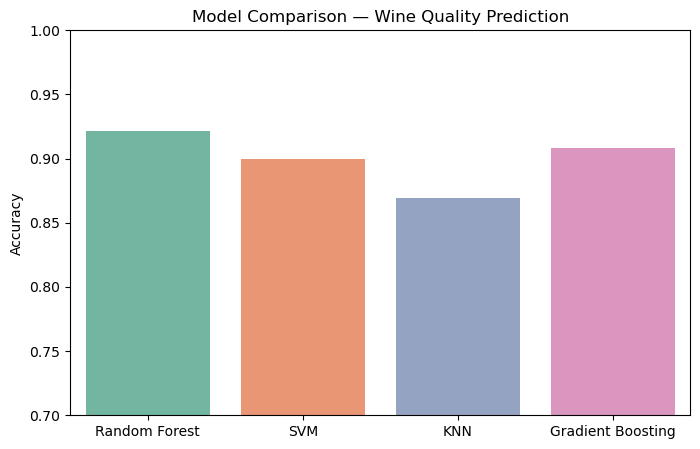

🏆 Best Model: Random Forest with Accuracy: 92.14%


In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.title("Model Comparison — Wine Quality Prediction")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()

best_model = max(results, key=results.get)
print(f"🏆 Best Model: {best_model} with Accuracy: {results[best_model]*100:.2f}%")

#### Feature Importance (for Tree-based Models)

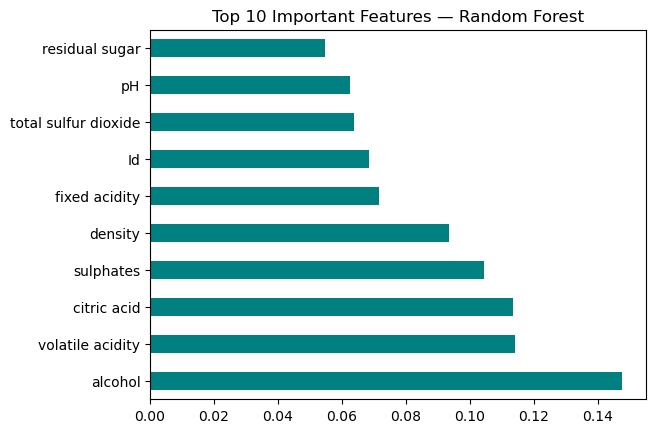

In [38]:
if best_model in ["Random Forest", "Gradient Boosting"]:
    model = models[best_model]
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title(f"Top 10 Important Features — {best_model}")
    plt.show()